<a href="https://colab.research.google.com/github/meenubenny/bike_sharind_demand_prediction/blob/main/MeenuBenny_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Seoul Bike Sharing Demand Prediction**

---



---




###**Steps**


---





1.   Importing necessary libraries
2.   Loading the data
3.   Prepare dataset
4.   Exploraatory data analysis
5.   Model training






##1.   Importing necessary libraries



In [1]:
import os 
import datetime
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler



from sklearn.datasets import load_boston


from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

##2. Loading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/SUPERVISED 1/SeoulBikeData.csv',sep=',',encoding='latin')

# Prepare dataset

In [4]:
df.shape

(8760, 14)

In [5]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#Summarizing the stats of the data
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [8]:
#Check the missing values
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
value = len(df[df.duplicated()])
value

0

In [10]:
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
'Temperature(°C)':'Temperature',
'Humidity(%)':'Humidity',
'Wind speed (m/s)':'Wind_speed',
'Visibility (10m)':'Visibility',
'Dew point temperature(°C)':'Dew_point_temperature',
'Solar Radiation (MJ/m2)':'Solar_Radiation',
'Rainfall(mm)':'Rainfall',
'Snowfall (cm)':'Snowfall',
'Functioning Day':'Functioning_Day'})

In [11]:
df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [12]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [14]:
df['weekend_day'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
df = df.drop(columns= ['Date','day','year'],axis=1)

In [15]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekend_day  
0  No Holiday             Yes     12            0  
1  No Holiday             Yes     12            0  
2  No Holiday             Yes     12            0  
3  No Holiday             Yes     12            0  
4  No Holiday             Yes     12            0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend_day            8760 non-null   int64  
dtypes: f

In [17]:
df.describe().transpose()  

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

In [19]:
# Numeric Features
numeric_features= df.select_dtypes(exclude='object')

In [20]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  month                  8760 non-null   int64  
 11  weekend_day            8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [21]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

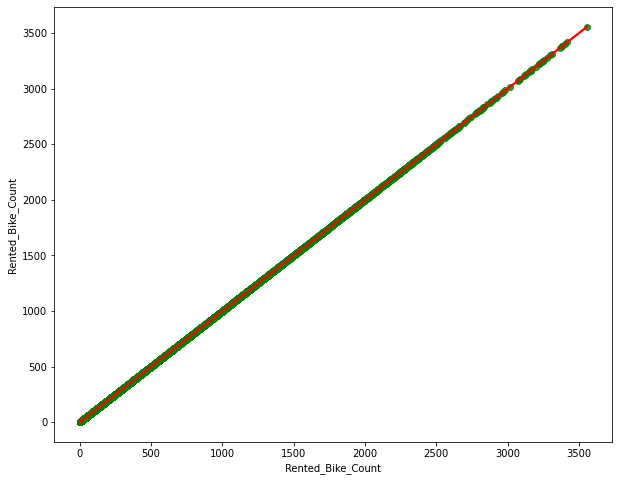

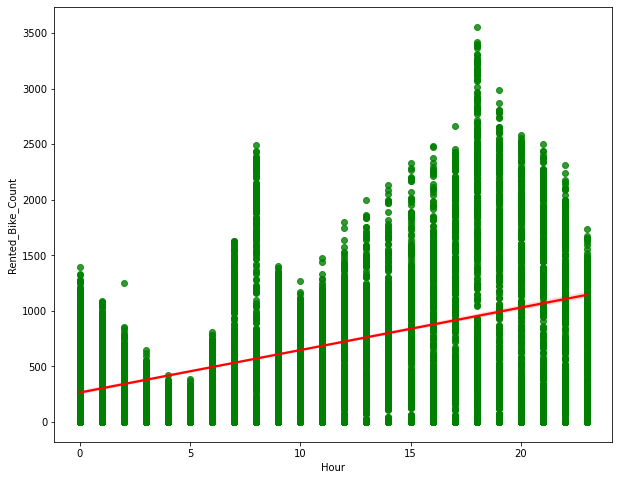

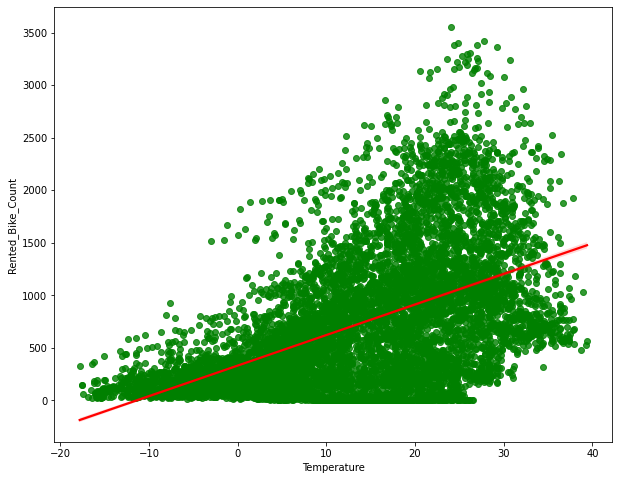

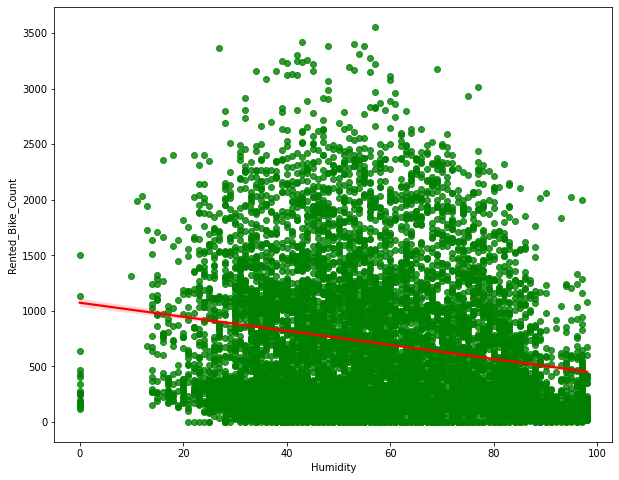

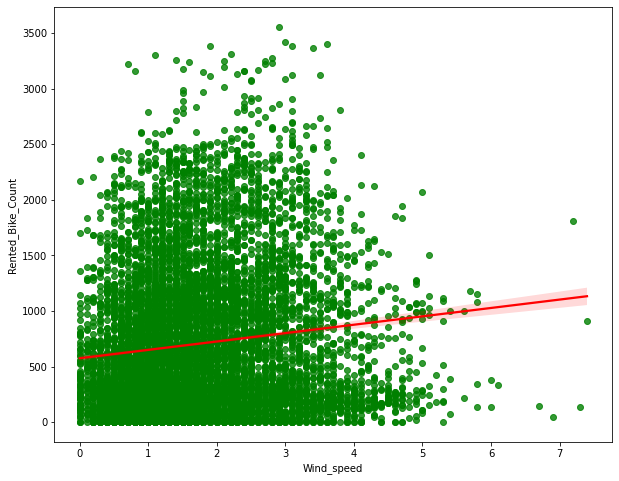

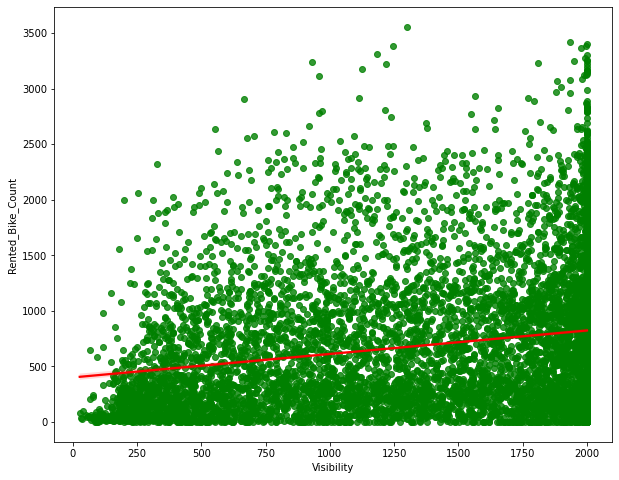

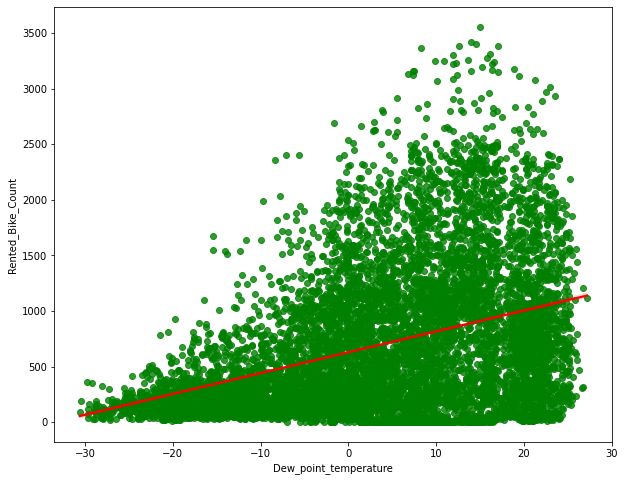

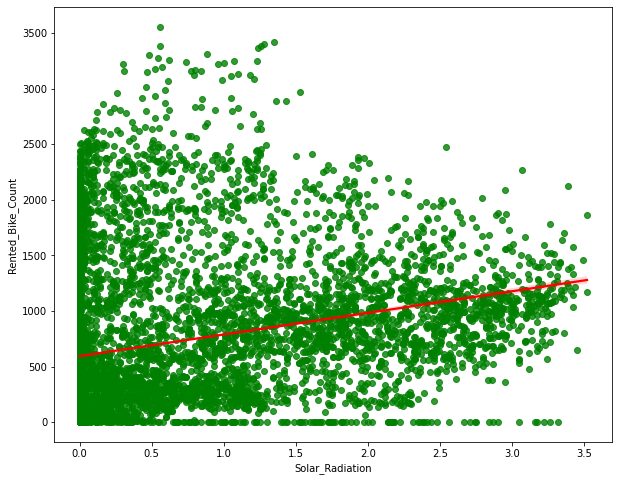

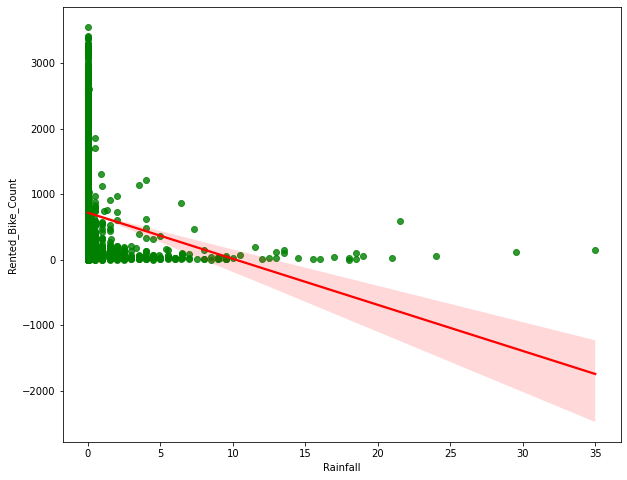

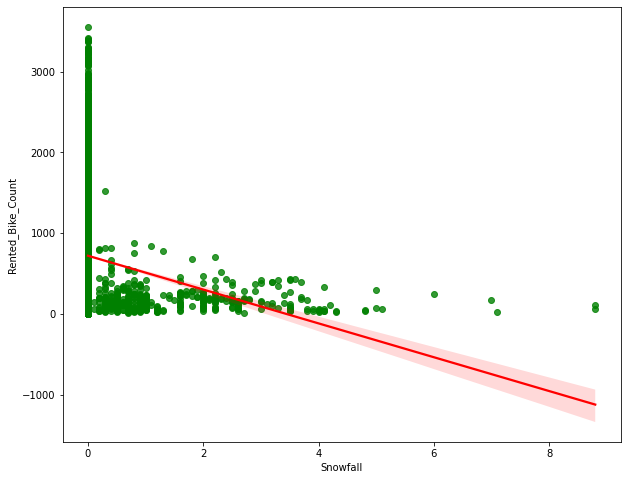

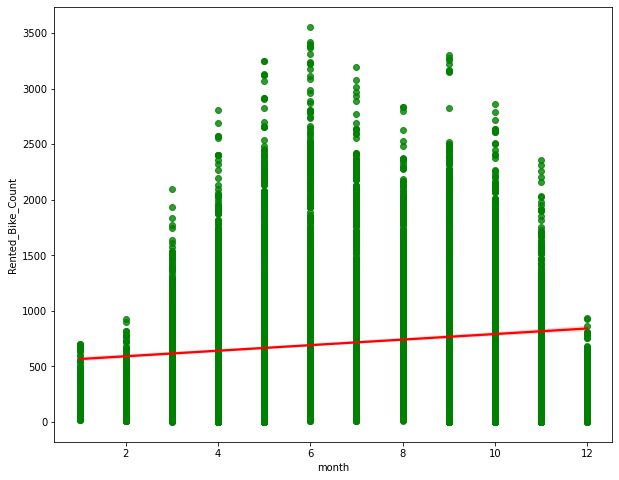

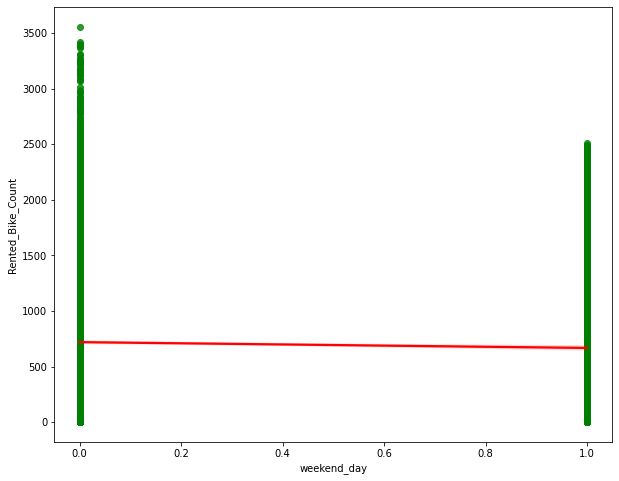

In [22]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  plt.figure(figsize=(10,8))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "red"})

In [23]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [24]:
categorical_features

Seasons     Holiday Functioning_Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

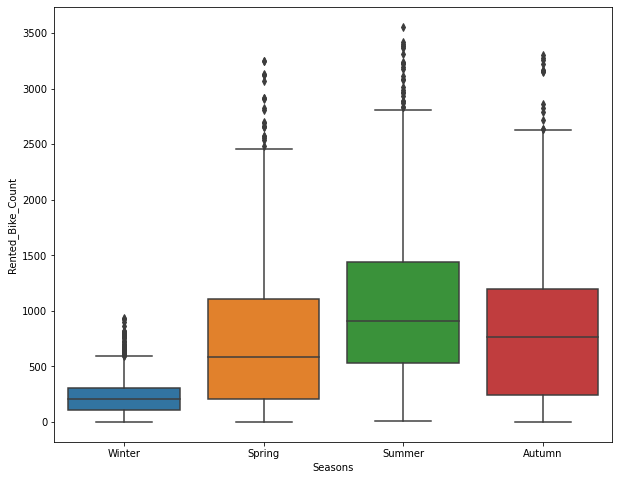

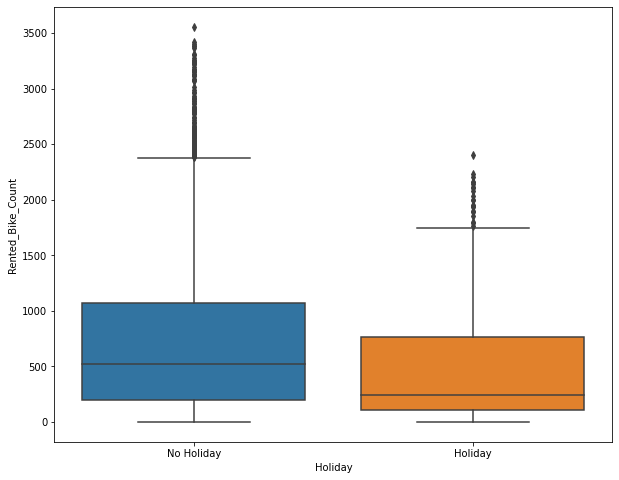

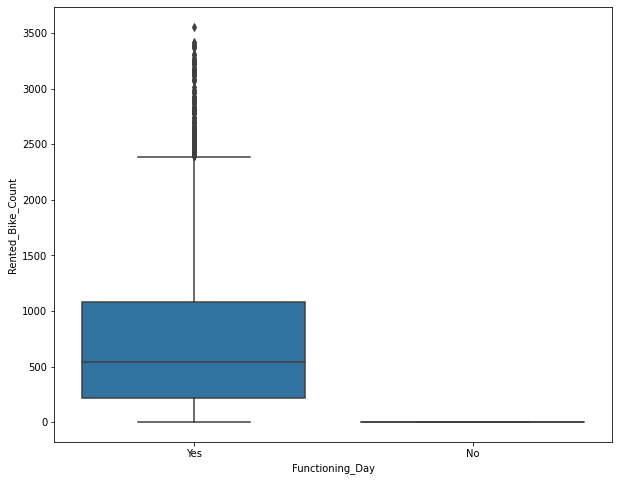

In [25]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented_Bike_Count"])
  plt.show()

In [26]:
df['weekend_day'].value_counts()

0    6264
1    2496
Name: weekend_day, dtype: int64

In [27]:
columns = ['Hour','month','weekend_day']
for col in columns:
  df[col] = df[col].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend_day            8760 non-null   c

# Exploratory data analysis 


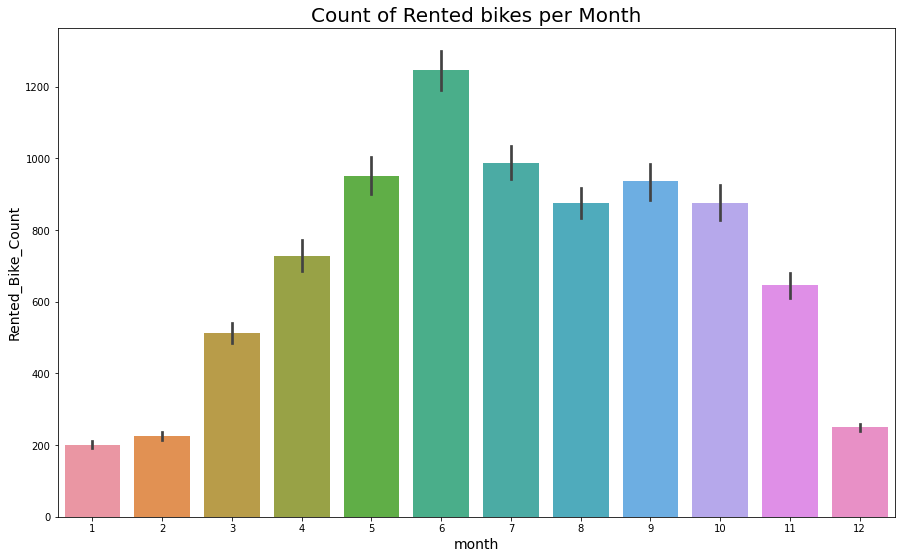

In [29]:
# Monthly trend of rented bikes
plt.figure(figsize=(15,9))
plt.ylabel('Month',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='month', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes per Month', fontsize = 20);
plt.show()

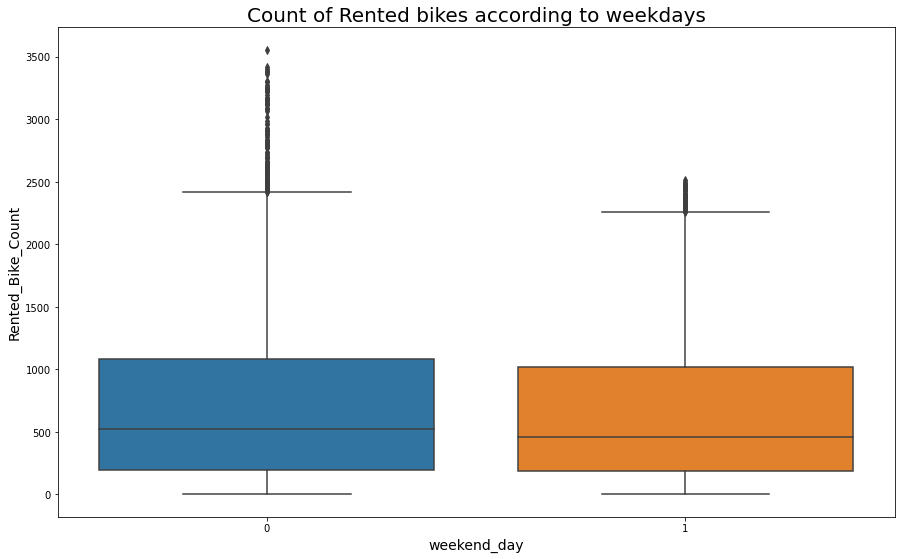

In [22]:
# Trend of rented bikes on weekend days
plt.figure(figsize=(15,9))
plt.ylabel('weekend days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.boxplot(x='weekend_day', y='Rented_Bike_Count', data = df)
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

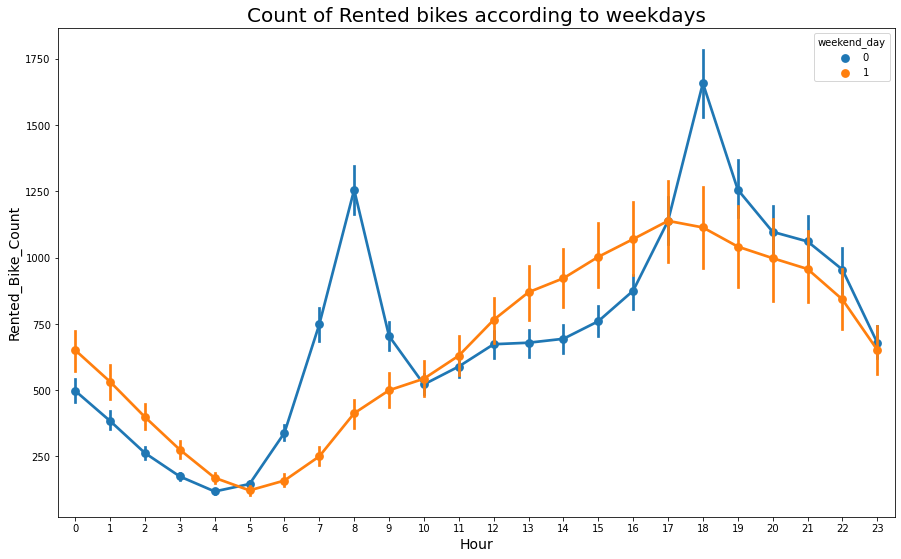

In [23]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='weekend_day')
graph.set_title('Count of Rented bikes according to weekdays', fontsize = 20);
plt.show()

In [24]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

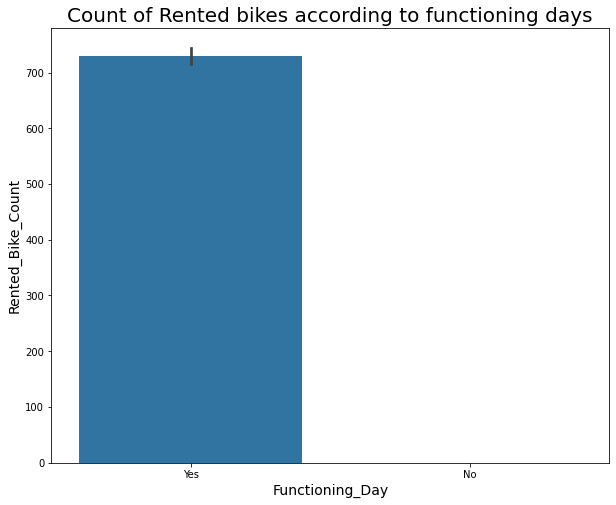

In [25]:
# Trend of rented bikes on functioning days 
plt.figure(figsize=(10,8))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Functioning_Day', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

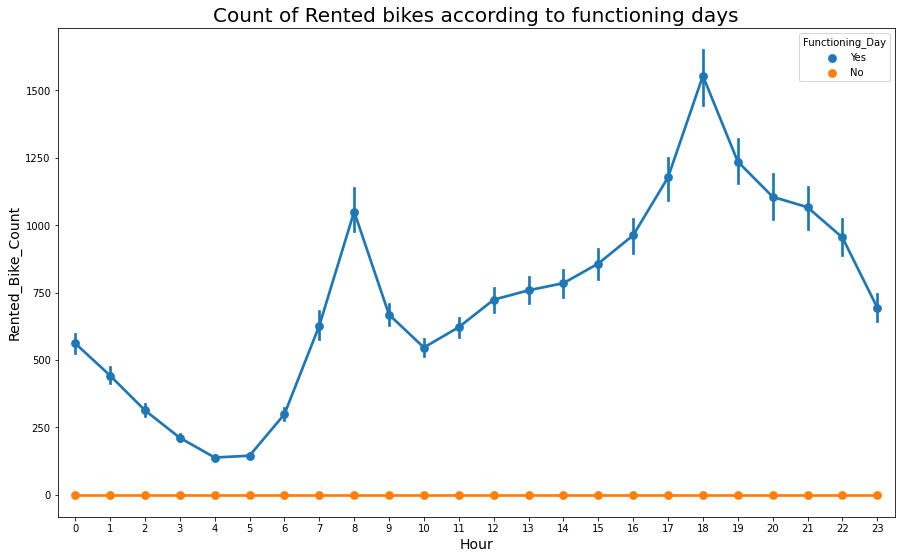

In [26]:
plt.figure(figsize=(15,9))
plt.ylabel('Functioning Days',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Functioning_Day')
graph.set_title('Count of Rented bikes according to functioning days', fontsize = 20);
plt.show()

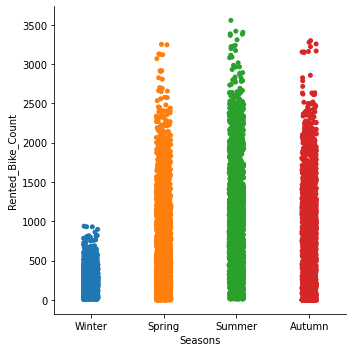

In [27]:
# Trend of rented bikes per seasons
graph=sns.catplot(x='Seasons',y='Rented_Bike_Count', data=df)
plt.show()

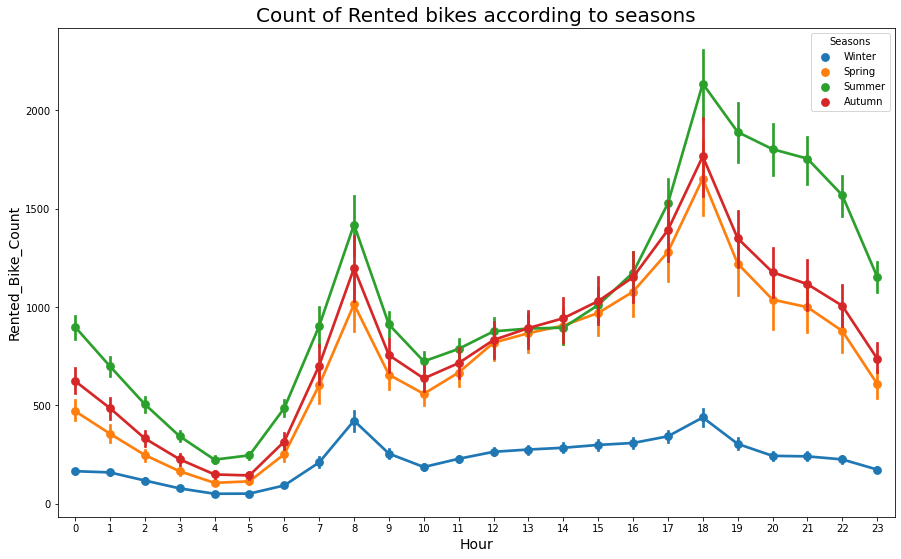

In [28]:
plt.figure(figsize=(15,9))
plt.ylabel('Hour',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.pointplot(x='Hour', y='Rented_Bike_Count', data=df, hue='Seasons')
graph.set_title('Count of Rented bikes according to seasons', fontsize = 20);
plt.show()

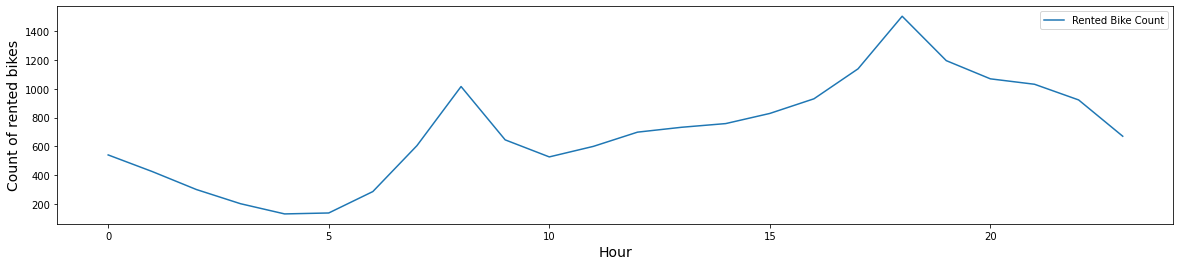

In [29]:
# Average count of rented bikes per hour
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()
plt.figure(figsize=(20,4))
plt.ylabel('Count of rented bikes',fontsize=14)
plt.xlabel('Hour',fontsize=14)
sns.lineplot( x = 'Hour', y = avg_rent_hrs, data = df, label = 'Rented Bike Count')
graph.set_title('Average Bikes Rented Per Hour', fontsize = 20);


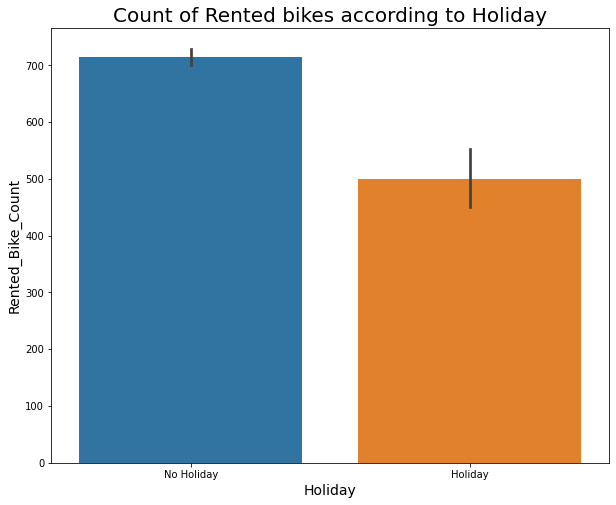

In [30]:
# Trend of rented bikes on holidays
plt.figure(figsize=(10,8))
plt.ylabel('Holiday',fontsize=14)
plt.xlabel('Count of rented bikes',fontsize=14)
graph=sns.barplot(x='Holiday', y='Rented_Bike_Count', data=df)
graph.set_title('Count of Rented bikes according to Holiday', fontsize = 20);
plt.show()

# Data distributions 

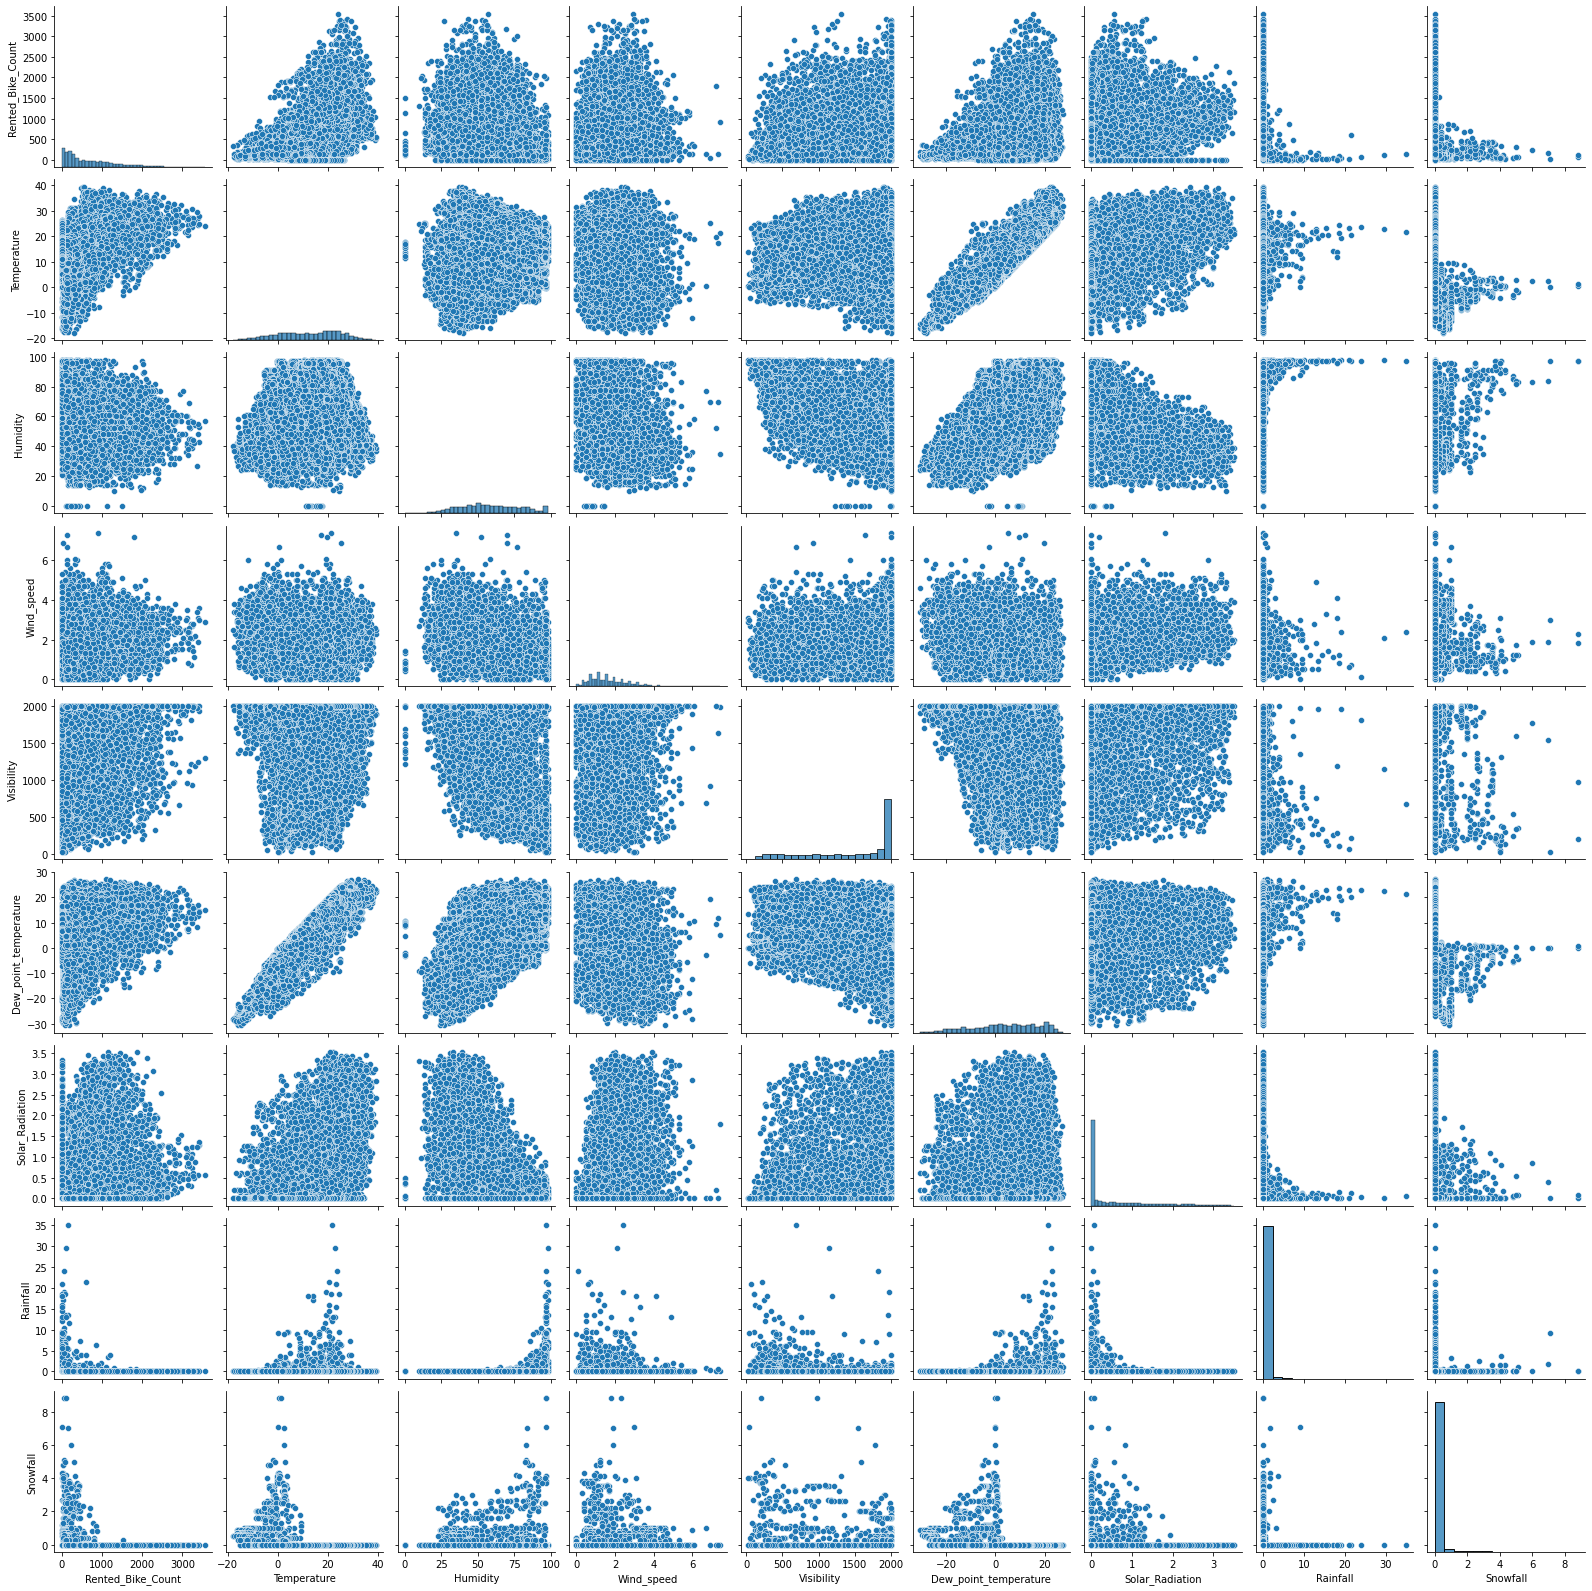

In [ ]:
#Check for multicollinearity
sns.pairplot(df)
plt.show()

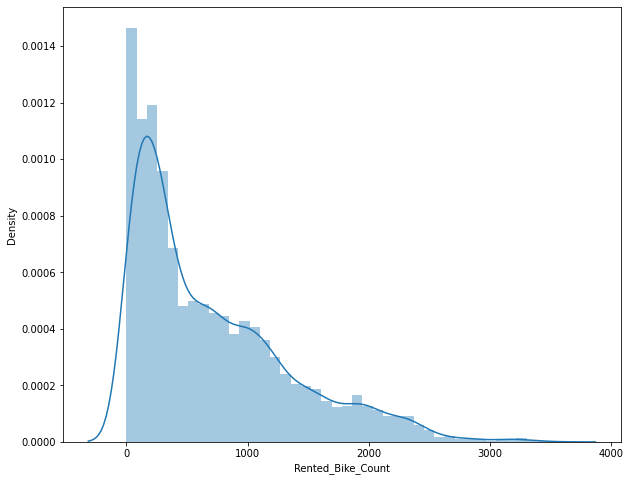

In [31]:
#visualising distribution of rented bike count
plt.figure(figsize=(10,8))
sns.distplot(df['Rented_Bike_Count'])
plt.show()

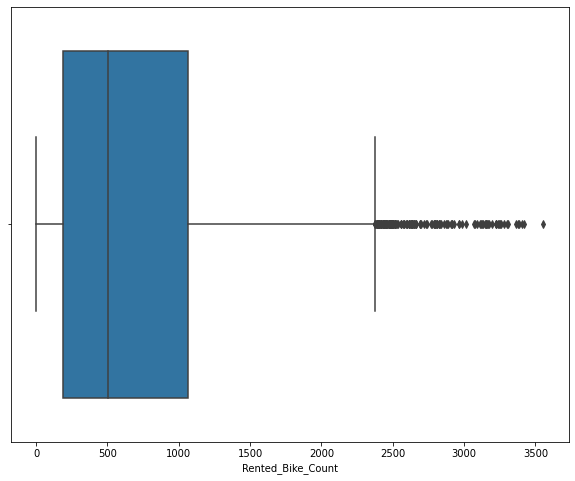

In [32]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

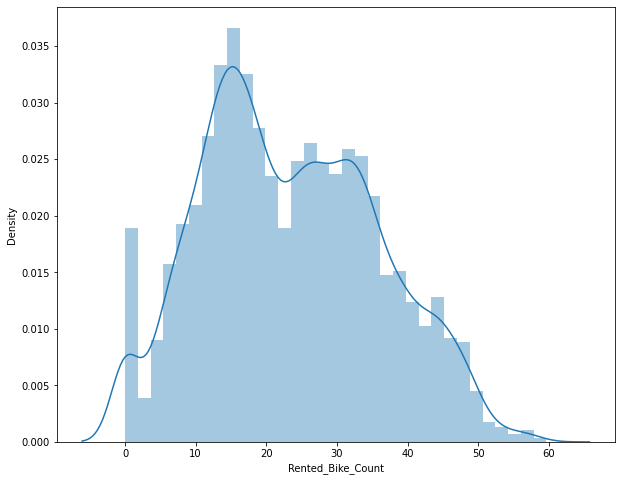

In [33]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))
plt.show()

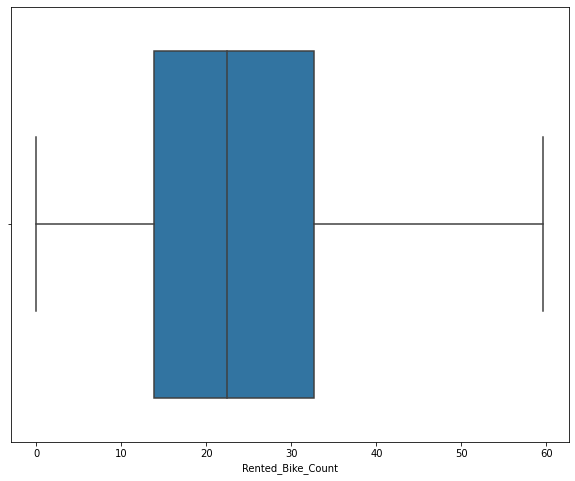

In [34]:
# After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,8))
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

In [35]:
#Check for correlation
df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.121108   
Temperature                     0.538558     1.000000  0.159371   -0.036252   
Humidity                       -0.199780     0.159371  1.000000   -0.336683   
Wind_speed                      0.121108    -0.036252 -0.336683    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.171507   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.176486   
Solar_Radiation                 0.261837     0.353505 -0.461919    0.332274   
Rainfall                       -0.123074     0.050282  0.236397   -0.019674   
Snowfall                       -0.141804    -0.218405  0.108183   -0.003554   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.261837   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind_speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew_point_temperature   -0.176630               1.000000         0.094381   
Solar_Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.123074 -0.141804  
Temperature            0.050282 -0.218405  
Humidity               0.236397  0.108183  
Wind_speed            -0.019674 -0.003554  
Visibility            -0.167629 -0.121695  
Dew_point_temperature  0.125597 -0.150887  
Solar_Radiation       -0.074290 -0.072301  
Rainfall               1.000000  0.008500  
Snowfall               0.008500  1.000000

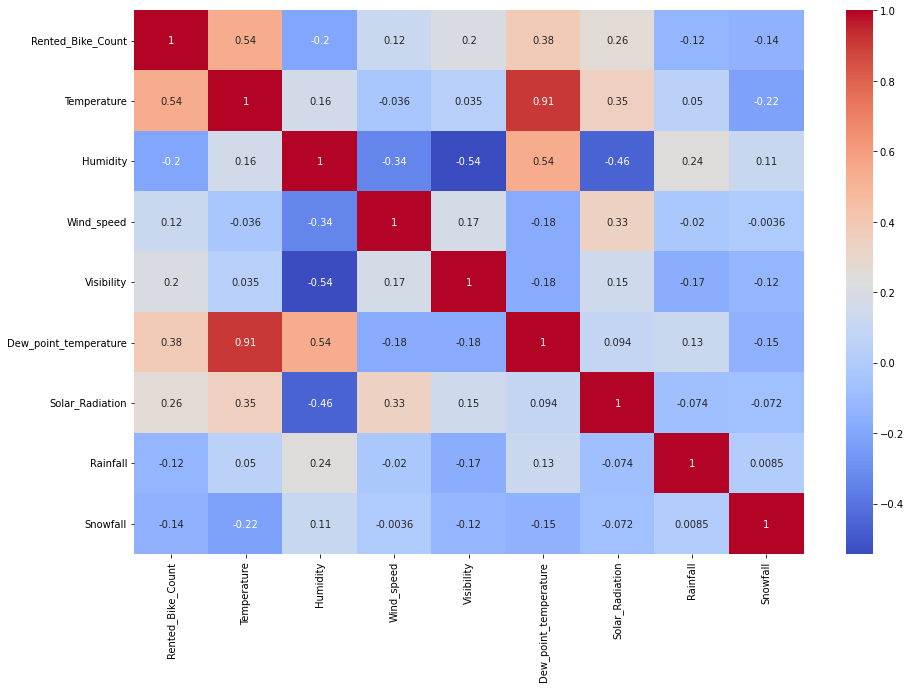

In [36]:
#checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

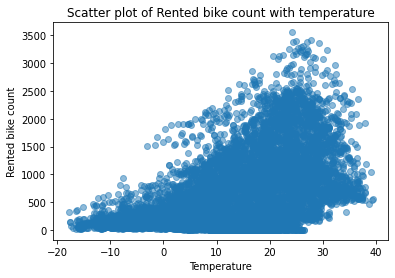

In [37]:
plt.scatter(df['Temperature'], df['Rented_Bike_Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike count with temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.show()

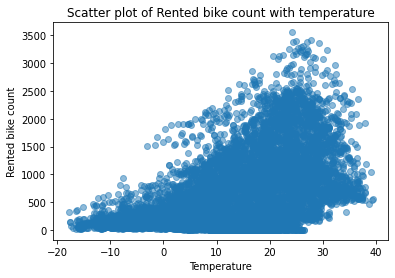

In [38]:
plt.scatter(df['Temperature'], df['Rented_Bike_Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike count with temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.show()

# Model Training

In [30]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [31]:
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning_Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [32]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [33]:
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning_Day_Yes  Rented_Bike_Count  Hour  Temperature  Humidity  \
0                    1                254     0         -5.2        37   
1                    1                204     1         -5.5        38   
2                    1                173     2         -6.0        39   
3                    1                107     3         -6.2        40   
4                    1                 78     4         -6.0        36   

   Wind_speed  Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  \
0         2.2        2000                  -17.6              0.0       0.0   
1         0.8        2000                  -17.6              0.0       0.0   
2         1.0        2000                  -17.7              0.0       0.0   
3         0.9        2000                  -17.6              0.0       0.0   
4         2.3        2000                  -18.6              0.0       0.0   

   Snowfall  month  weekend_day  
0       0.0     12            0  
1       0.0     12            0  
2       0.0     12            0  
3       0.0     12            0  
4       0.0     12            0

In [34]:
final_df.describe().transpose()

count         mean         std   min     25%      50%  \
Seasons_Spring         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Summer         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Winter         8760.0     0.246575    0.431042   0.0    0.00     0.00   
Holiday_No Holiday     8760.0     0.950685    0.216537   0.0    1.00     1.00   
Functioning_Day_Yes    8760.0     0.966324    0.180404   0.0    1.00     1.00   
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekend_day            8760.0     0.284932    0.451408   0.0    0.00     0.00   

                           75%      max  
Seasons_Spring            1.00     1.00  
Seasons_Summer            1.00     1.00  
Seasons_Winter            0.00     1.00  
Holiday_No Holiday        1.00     1.00  
Functioning_Day_Yes       1.00     1.00  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekend_day               1.00     1.00

In [35]:
#Independent and Dependent variables
# Train - Spliting data
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [36]:
X.shape

(8760, 16)

In [37]:
y=np.sqrt(final_df['Rented_Bike_Count'])

In [38]:
#spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [39]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **LINEAR REGRESSION**

In [47]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg= LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
#check the coefficeint
linear_reg.coef_

array([-0.98944317, -1.1687889 , -3.19714522,  0.65642901,  5.30674788,
        3.56055069,  1.14198481, -5.2932926 ,  0.14609468, -0.0530512 ,
        5.20206358, -0.55040705, -1.80682762,  0.04720224,  0.52638951,
       -0.60761008])

In [49]:
#check the intercept
linear_reg.intercept_

23.442819487037088

In [50]:
# On which parameter the model has been trained
linear_reg.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [51]:
# Prediction with test data
reg_pred = linear_reg.predict(X_test)

In [52]:
reg_pred 

array([29.22178613, 34.93287766, 37.66488389, ..., 28.24324043,
        2.44748399, 22.52956324])

# Assumptions

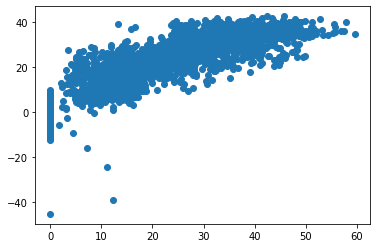

In [53]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,reg_pred)
plt.show()

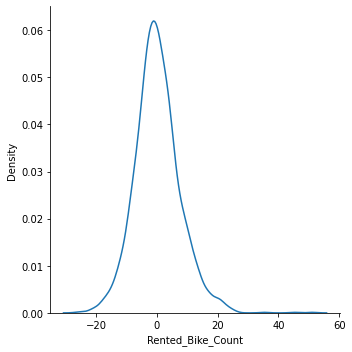

In [54]:
# Plot a scatter plot for residulas
residuals = y_test - reg_pred
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

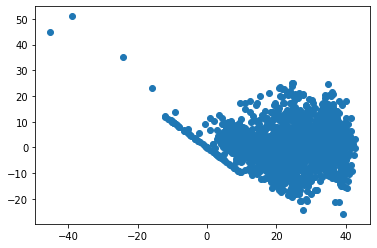

In [55]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(reg_pred,residuals)
plt.show()

In [56]:
#get the X_train and X-test value
y_pred_train_linear=linear_reg.predict(X_train)
y_pred_test_linear=linear_reg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# calculate the errors for train data
# Calculate the mean absolue error
MAE_linear = mean_absolute_error(y_train, y_pred_train_linear)
# Calculate the mean squared error
MSE_linear = mean_squared_error(y_train, y_pred_train_linear)
# Calculate the root mean squared error
RMSE_linear = np.sqrt(MSE_linear)
print('MSE_linear:',MSE_linear)
print('MAE_linear:',MAE_linear)
print('RMSE_linear:',RMSE_linear)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_linear = r2_score(y_train, y_pred_train_linear)
print("R2_linear :",r2_linear)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_linear :",1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE_linear: 52.52693137394992
MAE_linear: 5.582390382307961
RMSE_linear: 7.247546576183551
R2_linear : 0.6637858120748639
Adjusted R2_linear : 0.6613102359097456


In [58]:
# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_linear = mean_absolute_error(y_test, y_pred_test_linear)
# Calculate the mean squared error
MSEtest_linear = mean_squared_error(y_test, y_pred_test_linear)
# Calculate the root mean squared error
RMSE_linear = np.sqrt(MSE_linear)
print('MSEtest_linear:',MSE_linear)
print('MAEtest_linear:',MAE_linear)
print('RMSEtest_linear:',RMSE_linear)
#calculate r2 and adjusted r2

r2_linear = r2_score(y_test, y_pred_test_linear)
print("R2test_linear:",r2_linear)
Adjusted_R2test_linear=(1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_linear :",1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSEtest_linear: 52.52693137394992
MAEtest_linear: 5.582390382307961
RMSEtest_linear: 7.247546576183551
R2test_linear: 0.6368545829042638
Adjusted R2test_linear : 0.6341807096076546


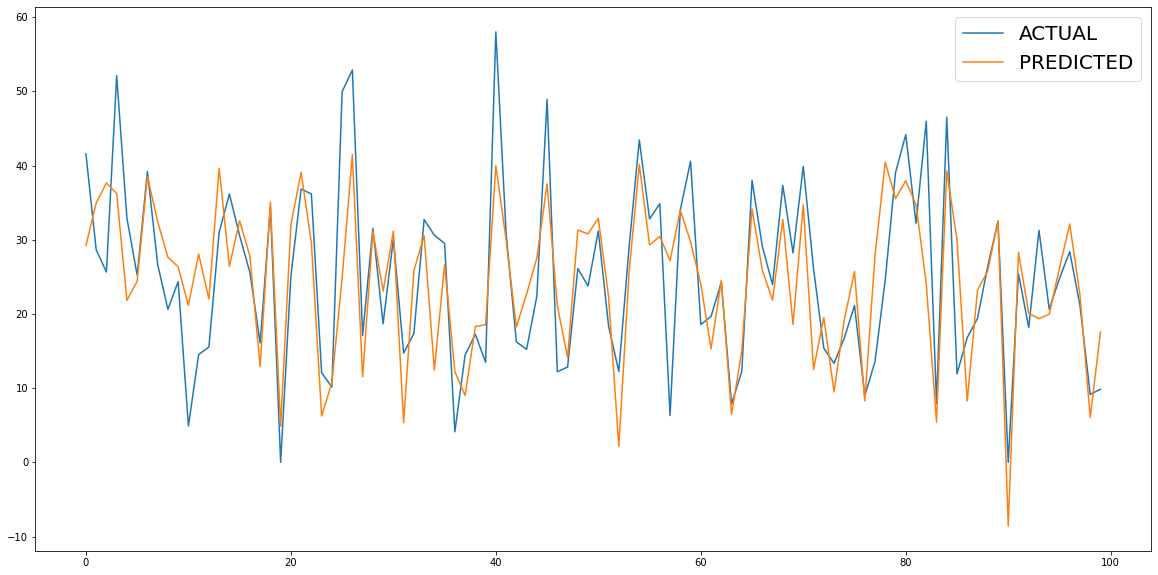

In [59]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(reg_pred[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **LASSO REGRESSION**

In [60]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#setting the parameters of the lasso model
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [61]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

In [43]:
# Print the model score
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0014}
-52.88625211453801


In [44]:
# Create the model score
print(lasso_regressor.score(X_test, y_test), lasso_regressor.score(X_train, y_train))


-54.95571756718334 -52.52708910162982


# Assumptions

In [62]:
# Calculate the mean absolue error
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
# Calculate the mean squared error
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
# Calculate the root mean squared error
RMSE_lasso = np.sqrt(MSE_lasso)
print('MSE_lasso:',MSE_lasso)
print('MAE_lasso:',MAE_lasso)
print('RMSE_lasso:',RMSE_lasso)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2_lasso :",r2)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_lasso :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE_lasso: 52.52708910162982
MAE_lasso: 5.5827620347156905
RMSE_lasso: 7.24755745762873
R2_lasso : 0.6637848024921142
Adjusted R2_lasso : 0.6613092188933447


In [63]:
# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
# Calculate the mean squared error
MSEtest_lasso = mean_squared_error(y_test, y_pred_test_lasso)
# Calculate the root mean squared error
RMSE_lasso = np.sqrt(MSE_lasso)
print('MSEtest_lasso:',MSE_lasso)
print('MAEtest_lasso:',MAE_lasso)
print('RMSEtest_lasso:',RMSE_lasso)
#calculate r2 and adjusted r2

r2_lasso = r2_score(y_test, y_pred_test_lasso)
print("R2test_lasso:",r2_lasso)
Adjusted_R2test_lasso=(1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_lasso :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSEtest_lasso: 52.52708910162982
MAEtest_lasso: 5.5827620347156905
RMSEtest_lasso: 7.24755745762873
R2test_lasso: 0.6368857804802632
Adjusted R2test_lasso : 0.6342121368942919


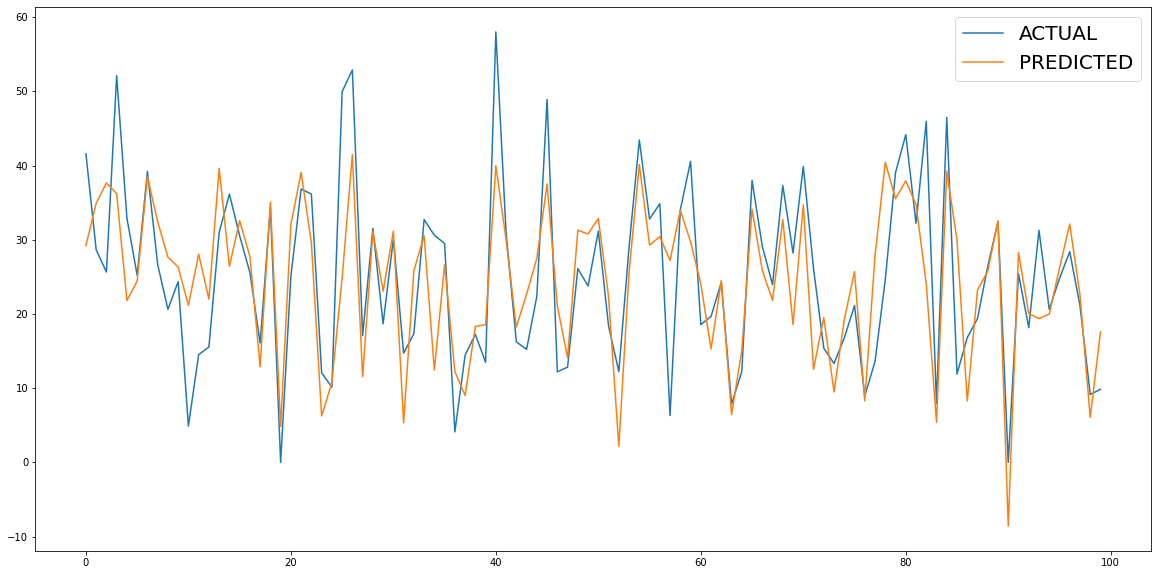

In [64]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_lasso[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **RIDGE REGRESSION**

In [65]:
from sklearn.linear_model import Ridge, LassoCV
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
#setting the parameters of the ridgemodel
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [66]:
#get the X_train and X-test value
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)


In [67]:
#Print the model score
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-52.856837179480394


In [68]:
# Create the model score
print(ridge_regressor.score(X_test, y_test), ridge_regressor.score(X_train, y_train))

-54.95706198219 -52.544149680845855


# Assumptions

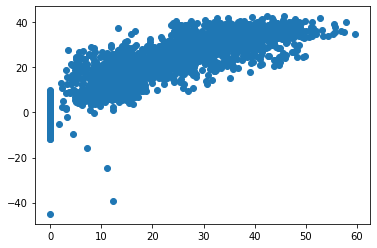

In [69]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_ridge)
plt.show()

In [70]:
# Calculate the mean absolue error
MAE_ridge= mean_absolute_error(y_train, y_pred_train_ridge)
# Calculate the mean squared error
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
# Calculate the root mean squared error
RMSE_ridge = np.sqrt(MSE_ridge)
print('MSE_ridge:',MSE_ridge)
print('MAE_ridge:',MAE_ridge)
print('RMSE_ridge:',RMSE_ridge)
#calculate r2 and adjusted r2

r2_ridge= r2_score(y_train, y_pred_train_ridge)
print("R2_ridge :",r2_ridge)
Adjusted_R2_ridge=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_ridge :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE_ridge: 52.544149680845855
MAE_ridge: 5.587902829067304
RMSE_ridge: 7.24873435027425
R2_ridge : 0.663675601199813
Adjusted R2_ridge : 0.6611992135418272


In [71]:
# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
# Calculate the mean squared error
MSEtest_ridge = mean_squared_error(y_test, y_pred_test_ridge)
# Calculate the root mean squared error
RMSE_ridge = np.sqrt(MSE_ridge)
print('MSEtest_ridge:',MSE_ridge)
print('MAEtest_ridge:',MAE_ridge)
print('RMSEtest_ridge:',RMSE_ridge)
#calculate r2 and adjusted r2

r2_ridge = r2_score(y_test, y_pred_test_ridge)
print("R2test_ridge:",r2_ridge)
Adjusted_R2test_ridge=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_ridge :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSEtest_ridge: 52.544149680845855
MAEtest_ridge: 5.587902829067304
RMSEtest_ridge: 7.24873435027425
R2test_ridge: 0.6368768973971655
Adjusted R2test_ridge : 0.6342031884042316


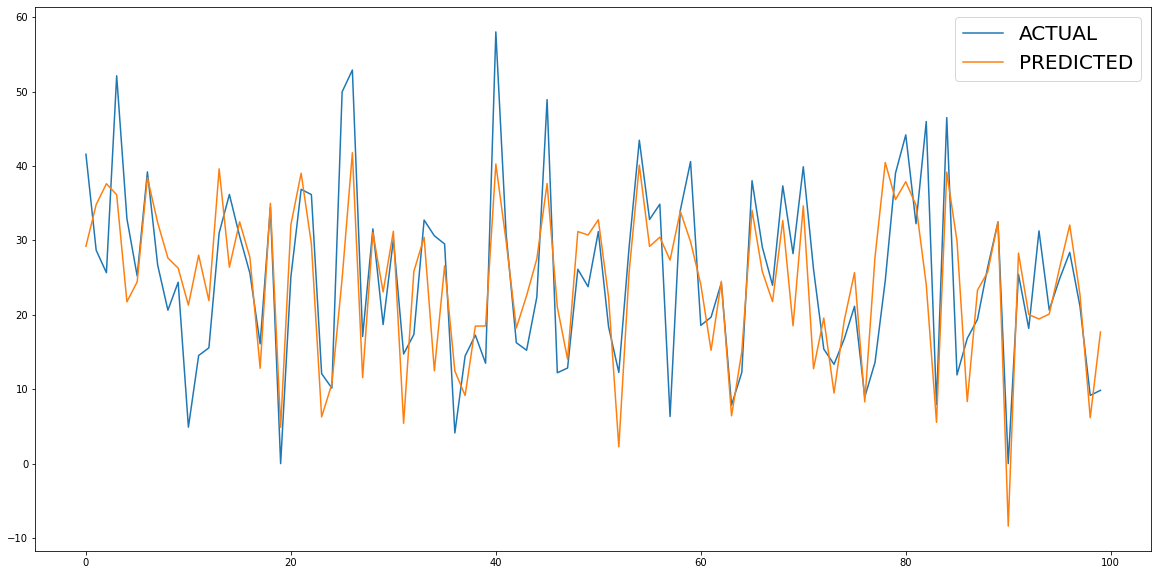

In [72]:
# ploting the line graph of actual and predicted values
plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_ridge[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

# **RANDOM FOREST REGRESSOR**

In [73]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor
#creating model of random forest
random = RandomForestRegressor(n_estimators = 180, random_state = 21 ,criterion= 'mse',max_depth=13 ,max_leaf_nodes= 80)

In [74]:
random.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=13, max_leaf_nodes=80,
                      n_estimators=180, random_state=21)

In [75]:
# Prediction on train dataset

y_pred_train_random = random.predict(X_train)

In [76]:
#Prediction on test dataset

y_pred_test_random = random.predict(X_test)

# Assumptions

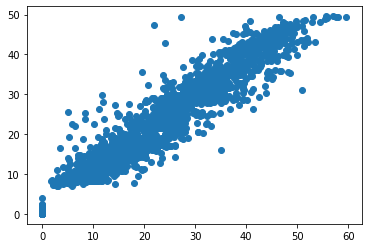

In [77]:
# Plot a scatter plot for the prediction
# Check Homoscedasticity
plt.scatter(y_test,y_pred_test_random)
plt.show()

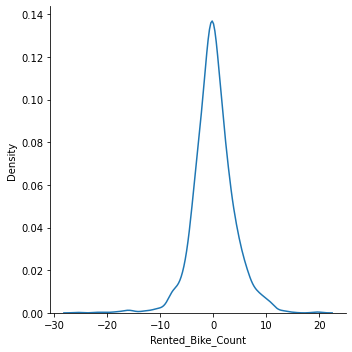

In [78]:
# Plot a scatter plot for residulas
residuals = y_test - y_pred_test_random
sns.displot(residuals, kind='kde') # To check distributions
plt.show()

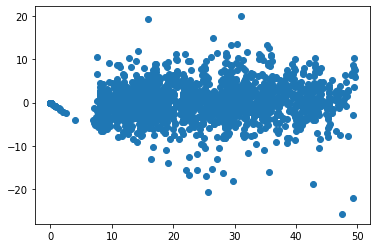

In [79]:
# Plot a scatter plot with respect to prediction and residulas
plt.scatter(y_pred_test_random,residuals)
plt.show()

In [80]:
# calculate the errors for train data
# Calculate the mean absolue error
MAE_random = mean_absolute_error(y_train, y_pred_train_random)
# Calculate the mean squared error
MSE_random = mean_squared_error(y_train, y_pred_train_random)
# Calculate the root mean squared error
RMSE_random = np.sqrt(MSE_random)
print('MSE_random:',MSE_random)
print('MAE_random:',MAE_random)
print('RMSE_random:',RMSE_random)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_random = r2_score(y_train, y_pred_train_random)
print("R2_random :",r2_random)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2_random :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE_random: 12.331080726433425
MAE_random: 2.564619664742169
RMSE_random: 3.511563857661345
R2_random : 0.9210712641261734
Adjusted R2_random : 0.6611992135418272


In [81]:
# calculate the errors for test data
# Calculate the mean absolue error
MAEtest_random = mean_absolute_error(y_test, y_pred_test_random)
# Calculate the mean squared error
MSEtest_random = mean_squared_error(y_test, y_pred_test_random)
# Calculate the root mean squared error
RMSE_random = np.sqrt(MSE_random)
print('MSEtest_random:',MSE_random)
print('MAEtest_random:',MAE_random)
print('RMSEtest_random:',RMSE_random)
#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_random = r2_score(y_test, y_pred_test_random)
print("R2test_random :",r2_random)
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2test_random :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSEtest_random: 12.331080726433425
MAEtest_random: 2.564619664742169
RMSEtest_random: 3.511563857661345
R2test_random : 0.9009924221703873
Adjusted R2test_random : 0.6342031884042316


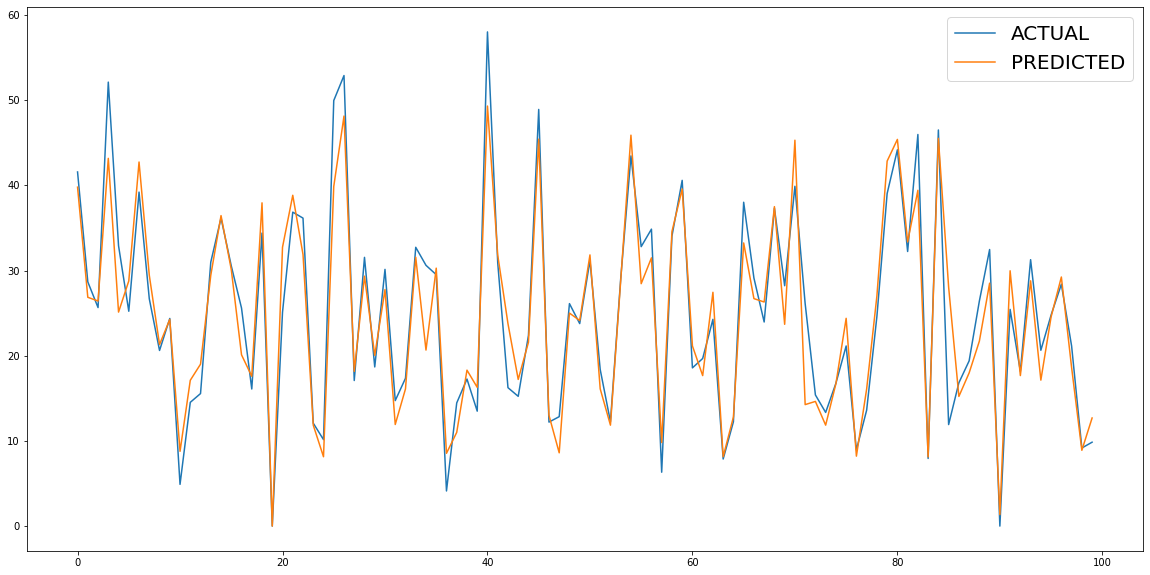

In [82]:
# ploting the line graph of actual and predicted values

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(y_pred_test_random[:100])
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()
